1-Exploration des données

télécharger les données audio
explorer les données audio
visualisation - > quels éléments permettent de distinguer les émotions des différentes expressions?

2 - machine learning

transformer les fichiers audio en fichier csv
appliquer le modèle







Filename identifiers 

Modality (01 = full-AV, 02 = video-only, 03 = audio-only).
Vocal channel (01 = speech, 02 = song).
Emotion (01 = neutral, 02 = calm, 03 = happy, 04 = sad, 05 = angry, 06 = fearful, 07 = disgust, 08 = surprised).
Emotional intensity (01 = normal, 02 = strong). NOTE: There is no strong intensity for the 'neutral' emotion.
Statement (01 = "Kids are talking by the door", 02 = "Dogs are sitting by the door").
Repetition (01 = 1st repetition, 02 = 2nd repetition).
Actor (01 to 24. Odd numbered actors are male, even numbered actors are female).


https://zenodo.org/record/1188976#.YY1Ksk6ZM2w


https://iq.opengenus.org/introduction-to-librosa/

In [1]:
import librosa as lr
import librosa.display
import os
import pandas as pd
import numpy as np

import warnings

import matplotlib.pyplot as plt
from matplotlib.pyplot import specgram

from glob import glob

from IPython.display import Audio


warnings.simplefilter("ignore")

In [2]:

# Load in file
x, sr = librosa.load("/Users/diebl/lab/FinalProject__RecognitionSpeechEmotion/audio_speech_actors_01-24/Actor_02/03-01-01-01-01-01-02.wav")

Text(0.5, 1.0, 'Waveplot - Female Neutral')

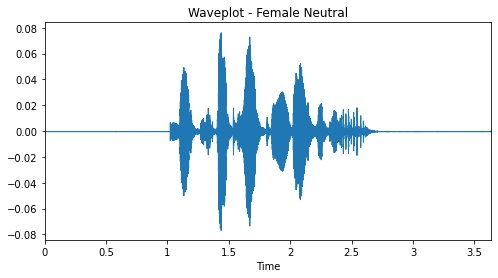

In [3]:
# plot
plt.figure(figsize=(8, 4))
librosa.display.waveplot(x, sr=sr)
plt.title('Waveplot - Female Neutral')
#plt.savefig('Waveplot_FemaleCalm.png')

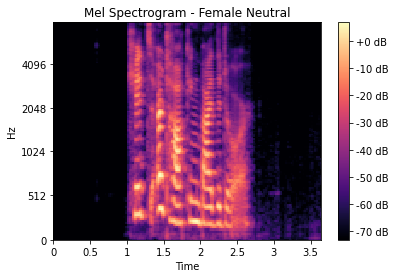

In [4]:
# Create mel spectrogram
spectrogram = librosa.feature.melspectrogram(y=x, sr=sr, n_mels=128,fmax=8000) 
spectrogram = librosa.power_to_db(spectrogram)

librosa.display.specshow(spectrogram, y_axis='mel', fmax=8000, x_axis='time');
plt.title('Mel Spectrogram - Female Neutral')
#plt.savefig('MelSpec_FemaleNeutral.png')
plt.colorbar(format='%+2.0f dB');

In [3]:
audio ="/Users/diebl/lab/FinalProject__RecognitionSpeechEmotion/audio_speech_actors_01-24/Actor_02/03-01-01-01-01-01-02.wav" # change with the name of your audio
y, sr = lr.load(audio) #you just need to make sure your audio is in the same folder in which you are coding or else you can change the path as per your requirement
time = np.arange(0,len(y))/sr
print(time) # prints timeline of arabic6

[0.00000000e+00 4.53514739e-05 9.07029478e-05 ... 3.63682540e+00
 3.63687075e+00 3.63691610e+00]


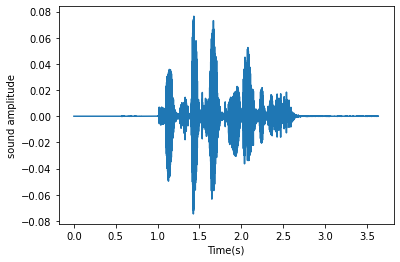

In [4]:
#timeline of the audio

fig, ax = plt.subplots()
ax.plot(time,y)
ax.set(xlabel='Time(s)',ylabel='sound amplitude')
plt.show()

In [16]:
S = np.abs(librosa.stft(y))
print(S)

[[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 7.0101349e-04
  5.9534976e-04 7.4798061e-04]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 1.7691579e-03
  1.2204108e-03 1.5524586e-03]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 3.0774814e-03
  9.9557370e-04 1.2979975e-03]
 ...
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 8.1822765e-07
  5.0093149e-07 5.0451058e-07]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 3.5271188e-07
  3.2602256e-07 7.1482600e-07]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 4.6518949e-07
  4.9953348e-07 1.1656493e-06]]


Text(0, 0.5, 'Amplitude')

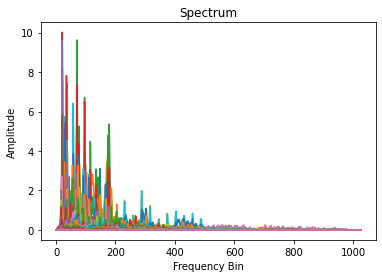

In [18]:
S = np.abs(librosa.stft(y))
plt.plot(S)
plt.title('Spectrum')
plt.xlabel('Frequency Bin')
plt.ylabel('Amplitude')

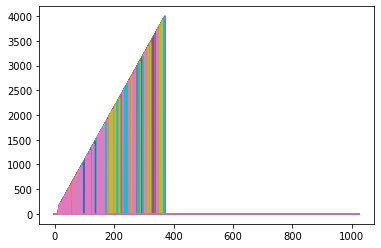

In [36]:
#pitch of the audio

pitches, magnitudes = lr.piptrack(y=y, sr=sr)
plt.show()
plt.plot(pitches)
plt.show()

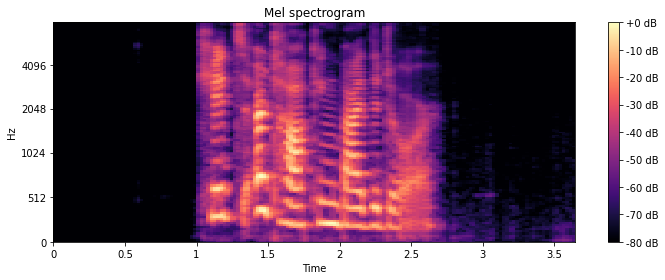

In [8]:
#Mel-Scaled Spectogram


lr.feature.melspectrogram(y=y, sr=sr)

D = np.abs(lr.stft(y))**2
S = lr.feature.melspectrogram(S=D)
S = lr.feature.melspectrogram(y=y, sr=sr, n_mels=128,fmax=8000)
plt.figure(figsize=(10, 4))
lr.display.specshow(lr.power_to_db(S,ref=np.max),y_axis='mel', fmax=8000,x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel spectrogram')
plt.tight_layout()
plt.show()

In [37]:
mel = lr.feature.melspectrogram(y=y, sr=sr)
print(mel)

[[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 1.0106435e-05
  5.1452248e-06 1.7684675e-06]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 3.2602857e-05
  1.6741637e-05 4.4259073e-06]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 6.5488503e-06
  4.2595252e-06 3.1876516e-06]
 ...
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 7.3441933e-09
  6.3662609e-09 3.3576215e-09]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 1.8264978e-09
  2.3193825e-09 1.3903405e-09]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 1.8682302e-10
  1.5888184e-10 1.1963135e-10]]


In [39]:
db_spec= librosa.power_to_db(mel)
print(db_spec)

[[-73.22303  -73.22303  -73.22303  ... -49.954018 -52.885956 -57.52403 ]
 [-73.22303  -73.22303  -73.22303  ... -44.867443 -47.762024 -53.539978]
 [-73.22303  -73.22303  -73.22303  ... -51.83835  -53.70639  -54.96529 ]
 ...
 [-73.22303  -73.22303  -73.22303  ... -73.22303  -73.22303  -73.22303 ]
 [-73.22303  -73.22303  -73.22303  ... -73.22303  -73.22303  -73.22303 ]
 [-73.22303  -73.22303  -73.22303  ... -73.22303  -73.22303  -73.22303 ]]


In [12]:
D = librosa.stft(y)
D

array([[ 0.0000000e+00+0.0000000e+00j,  0.0000000e+00+0.0000000e+00j,
         0.0000000e+00+0.0000000e+00j, ...,
         7.0101349e-04+0.0000000e+00j, -5.9534976e-04+0.0000000e+00j,
         7.4798061e-04+0.0000000e+00j],
       [ 0.0000000e+00+0.0000000e+00j,  0.0000000e+00+0.0000000e+00j,
         0.0000000e+00+0.0000000e+00j, ...,
        -7.9500041e-04-1.5804728e-03j,  1.1265737e-03+4.6929144e-04j,
        -8.2193804e-04+1.3170216e-03j],
       [ 0.0000000e+00-0.0000000e+00j,  0.0000000e+00-0.0000000e+00j,
         0.0000000e+00-0.0000000e+00j, ...,
         1.0382141e-03+2.8970682e-03j, -4.2492209e-04-9.0033782e-04j,
        -1.2515772e-03-3.4402369e-04j],
       ...,
       [ 0.0000000e+00+0.0000000e+00j,  0.0000000e+00+0.0000000e+00j,
         0.0000000e+00+0.0000000e+00j, ...,
        -7.9677982e-08-8.1433893e-07j,  3.6893647e-07+3.3884842e-07j,
        -2.0497819e-07+4.6099333e-07j],
       [ 0.0000000e+00+0.0000000e+00j,  0.0000000e+00+0.0000000e+00j,
         0.0000000e+00

In [14]:
s = np.abs(librosa.stft(y)**2) # Get magnitude of stft
chroma = librosa.feature.chroma_stft(S=s, sr=sr)
chroma

array([[0.        , 0.        , 0.        , ..., 0.24395454, 0.31846553,
        0.32508218],
       [0.        , 0.        , 0.        , ..., 0.31539303, 0.45241863,
        0.5585135 ],
       [0.        , 0.        , 0.        , ..., 0.3857024 , 0.44584686,
        0.7938305 ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.6120909 , 0.82148933,
        0.52295595],
       [0.        , 0.        , 0.        , ..., 0.5704866 , 0.7633481 ,
        0.53098106],
       [0.        , 0.        , 0.        , ..., 0.31729388, 0.4372213 ,
        0.34768087]], dtype=float32)

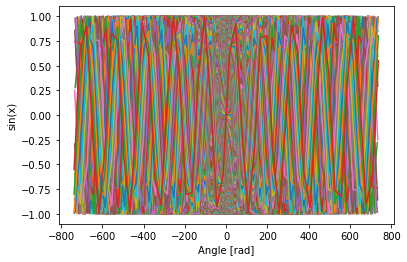

In [16]:
chroma = np.cumsum(chroma)

x = np.linspace(-chroma, chroma)
plt.plot(x, np.sin(x))
plt.xlabel('Angle [rad]')
plt.ylabel('sin(x)')
plt.axis('tight')
plt.show()

In [23]:
def vizualisation(audio):
    y, sr = lr.load(audio)
    time = np.arange(0,len(y))/sr
    
    #signal of the audio

    fig, ax = plt.subplots()
    ax.plot(time,y)
    ax.set(xlabel='Time(s)',ylabel='sound amplitude')
    plt.show()
    
    #spectrum
    S = np.abs(librosa.stft(y))
    plt.plot(S)
    plt.title('Spectrum')
    plt.xlabel('Frequency Bin')
    plt.ylabel('Amplitude')
    plt.show()
    
    #pitch of the audio

    pitches, magnitudes = lr.piptrack(y=y, sr=sr)
    plt.subplot(212)
    plt.plot(pitches)
    plt.show()
    
    
    #Mel-Scaled Spectogram

    lr.feature.melspectrogram(y=y, sr=sr)

    D = np.abs(lr.stft(y))**2
    S = lr.feature.melspectrogram(S=D)
    S = lr.feature.melspectrogram(y=y, sr=sr, n_mels=128,fmax=8000)
    plt.figure(figsize=(10, 4))
    lr.display.specshow(lr.power_to_db(S,ref=np.max),y_axis='mel', fmax=8000,x_axis='time')
    plt.colorbar(format='%+2.0f dB')
    plt.title('Mel spectrogram')
    plt.tight_layout()
    plt.show()

In [21]:
audio1 = "/Users/diebl/lab/FinalProject__RecognitionSpeechEmotion/audio_speech_actors_01-24/Actor_02/03-01-02-01-01-01-02.wav"

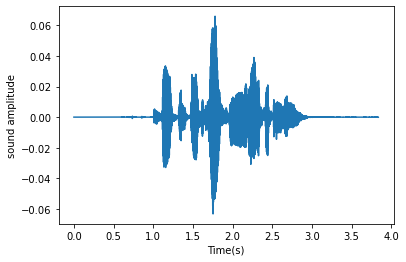

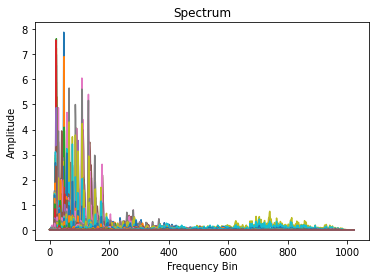

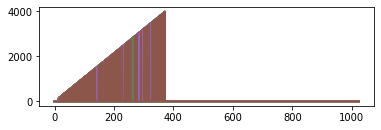

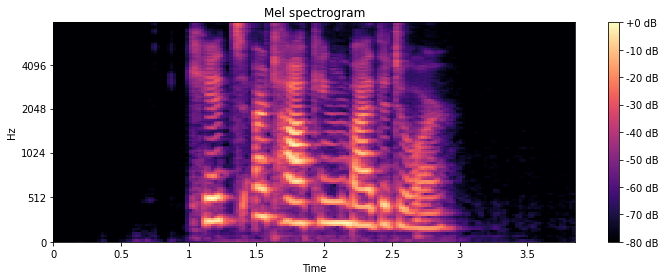

In [24]:
vizualisation(audio1)

In [25]:
#surprise 08 Female
audio2 = "/Users/diebl/lab/FinalProject__RecognitionSpeechEmotion/audio_speech_actors_01-24/Actor_02/03-01-08-01-01-01-02.wav"

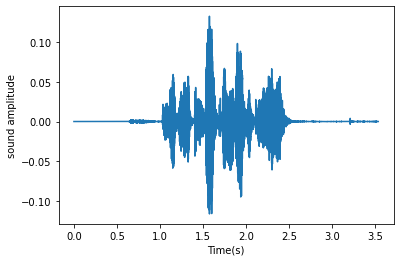

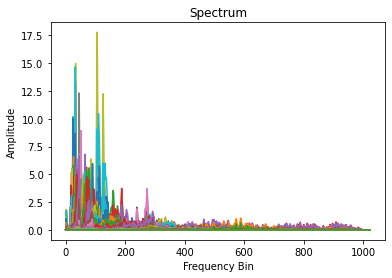

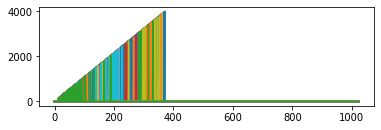

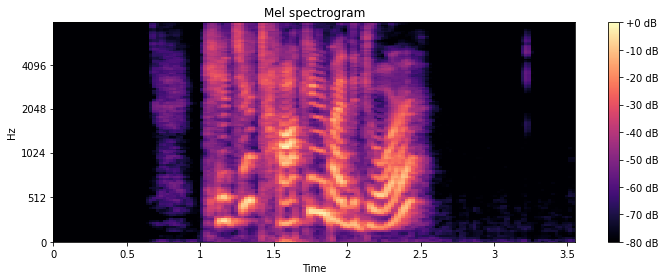

In [26]:
vizualisation(audio2)

In [27]:
#surprise 08 M
audio3 = "/Users/diebl/lab/FinalProject__RecognitionSpeechEmotion/audio_speech_actors_01-24/Actor_01/03-01-08-01-01-01-01.wav"

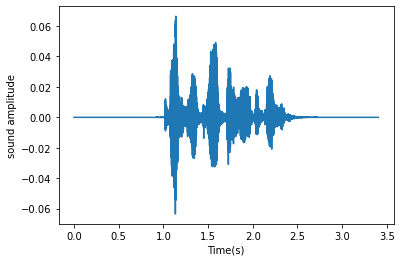

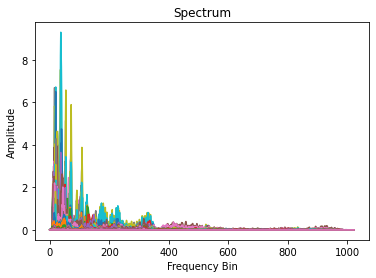

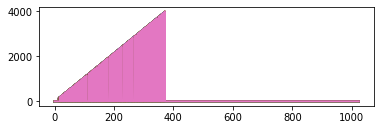

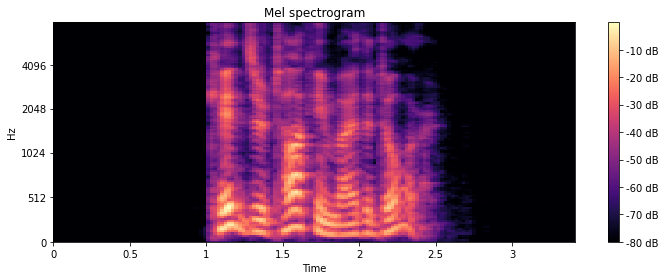

In [28]:
# surprise 08 M

vizualisation(audio3)

In [29]:
#surprise 08 M
audio4 = "/Users/diebl/lab/FinalProject__RecognitionSpeechEmotion/audio_speech_actors_01-24/Actor_03/03-01-08-01-01-01-03.wav"

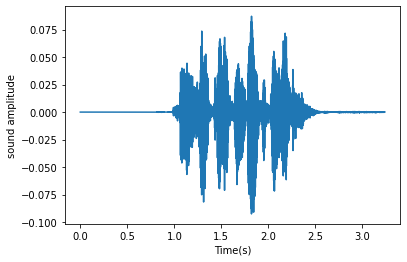

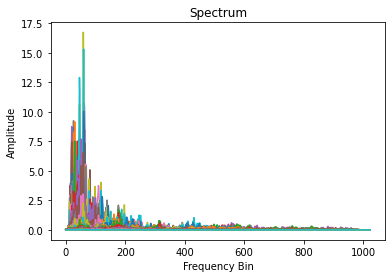

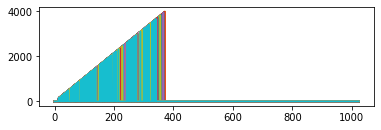

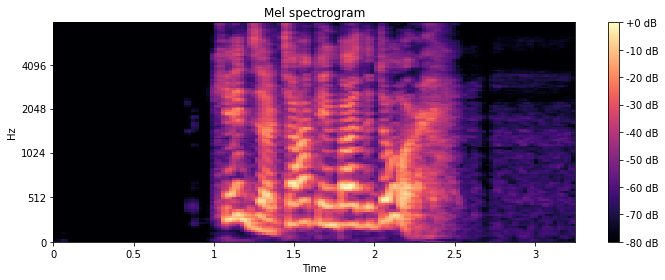

In [30]:
vizualisation(audio4)

In [31]:
audio5="/Users/diebl/lab/FinalProject__RecognitionSpeechEmotion/audio_speech_actors_01-24/Actor_05/03-01-08-01-01-01-05.wav"

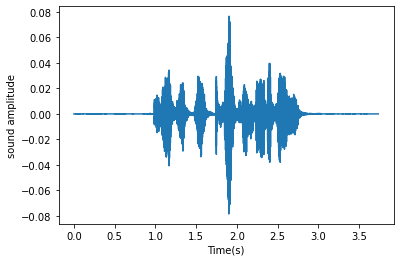

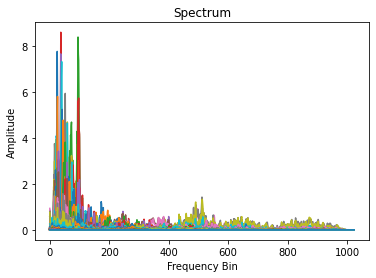

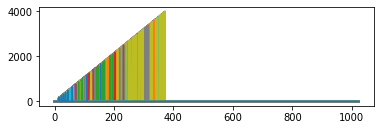

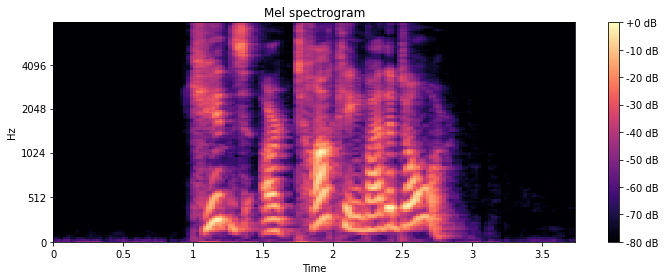

In [32]:
vizualisation(audio5)

In [33]:
audio6="/Users/diebl/lab/FinalProject__RecognitionSpeechEmotion/audio_speech_actors_01-24/Actor_07/03-01-08-01-01-01-07.wav"

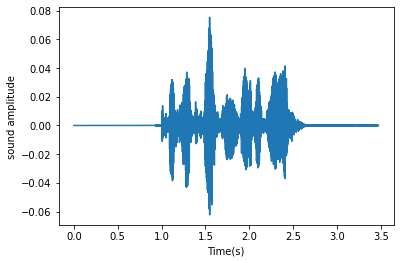

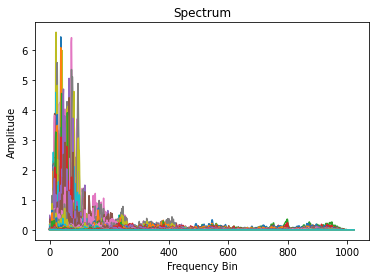

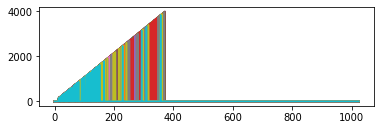

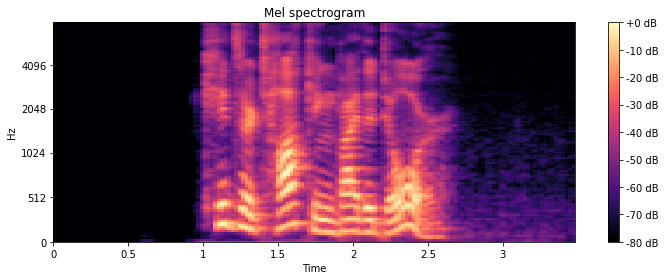

In [34]:
vizualisation(audio6)